# Initialization

In [4]:
import pandas as pd
#Reference: https://colab.research.google.com/notebooks/mlcc/intro_to_pandas.ipynb
import re
#References: https://www.regular-expressions.info/ and https://www.w3schools.com/python/python_regex.asp
import matplotlib.pyplot as plt
#Reference: https://matplotlib.org/
import random
#Reference: https://www.pythonforbeginners.com/random/how-to-use-the-random-module-in-python 

In [2]:
import nltk
from nltk.tokenize import TweetTokenizer
tweet = TweetTokenizer()
#Reference: https://www.nltk.org/api/nltk.tokenize.html

# Token, Types and TTR 

In [85]:
a = pd.read_csv(r"C:\Users\family\Desktop\tweets-dataset.csv")

#Find tokens

#alpha = " ".join(list(a['Sentence']))                    //Convert all information into a single string 
#alpha = alpha.lower()                                    //Lowercasing the strings
#alpha = re.sub('(https://[^\s]+|pic[^\s]+)', '', alpha)              //Remove all the urls using regex
#tokens = tweet.tokenize(alpha)                           //Applying tweet tokenization

#Here is the combination of the above 4 codes represnted as one
tokens = tweet.tokenize(re.sub('(https?://[^\s]+|pic[^\s]+)', '', " ".join(list(a['Sentence']))).lower()) 
#Reference: https://www.nltk.org/api/nltk.tokenize.html
#Regex References: https://www.regular-expressions.info/ and https://www.w3schools.com/python/python_regex.asp

#Find the length of the token
token_length = len(tokens)
print("Token Length: " + str(token_length))


#Finding the length of types
types_length = len(set(tokens))
print("Type length: " + str(types_length))


#Finding TTR
TTR = types_length / token_length
print("Token to Type ratio: " + str(TTR))

Token Length: 364068
Type length: 38971
Token to Type ratio: 0.107043189733786


# Zipf's Law for length

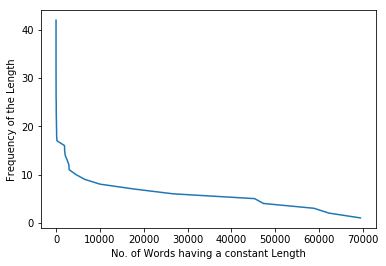

In [11]:
#Computing number of strings that have same length for all lengths
d = {}
for i in tokens:
    if len(i) not in d: d[len(i)] = 1
    else: d[len(i)] += 1

#Sort the frequencies according to the decreasing order i.e finding the frequency
e = [d[i] for i in d]
e.sort(reverse = True)

#Plot it in a graph
plt.xlabel("No. of Words having a constant Length")
plt.ylabel("Frequency of the Length")
plt.plot(e, [i for i in range(1, len(e) + 1)])
plt.show()
#Reference: https://matplotlib.org/ and https://classroom.google.com/u/0/c/NDEzNDY5MjY2NTFa

# Zipf's law for meaning

In [83]:
#Find enlish words that are present in the document
from nltk.corpus import wordnet
w = []
while(len(w) < 20):
    a = tokens[random.randint(0, len(tokens) - 1)]
    if wordnet.synsets(a): w.append(a)
#Reference: https://stackoverflow.com/questions/3788870/how-to-check-if-a-word-is-an-english-word-with-python

In [79]:
#To get synonyms for a word in a list
like = []
for syn in wordnet.synsets("same"):
    for l in syn.lemmas():
        like.append(l.name())
#Reference: https://www.guru99.com/wordnet-nltk.html

In [59]:
thesaurus = [
    ['like', 'alike', 'comparable', 'related', 'admire', 'appreciate', 'love', 'please', 'prefer', 'want'], 
    ['politics', 'government', 'campaigning'], 
    ['rock', 'shake', 'sway', 'rocked', 'convulse', 'jolt', 'swing'], 
    ['will', 'attitude', 'decision', 'desire', 'determination', 'discipline', 'feeling', 'inclination', 'intention', 'mind', 'passion', 'power', 'resolution', 'resolve', 'wish'], 
    ['slow', 'slowly', 'easy', 'tedious', 'time-consuming', 'deadening', 'dense', 'behind', 'ho-hum', 'retard', 'dim', 'dull', 'tardily', 'irksome', 'obtuse', 'decelerate', 'slow_up', 'slacken', 'slack', 'sluggish', 'tiresome', 'dumb', 'slow_down', 'boring', 'wearisome', 'low', 'moderate', 'tame', 'lethargy', 'heavy', 'gradual'],
    ['festival', 'holiday', 'fair', 'feast', 'gala', 'anniversary', 'commemoration'],
    ['sorry', 'sad', 'no-count', 'blue', 'grim', 'gloomy', 'deplorable', 'dismal', 'no-good', 'dark', 'bad', 'disconsolate', 'dreary', 'pitiful', 'regretful', 'no-account', 'good-for-naught', 'dingy', 'drear', 'good-for-nothing', 'meritless', 'distressing', 'drab', 'lamentable'],
    ['critic', 'authority', 'reviewer', 'commentator', 'judge', 'pandit', 'cartoonist'],
    ['look', 'attention', 'eye', 'glance', 'peek', 'view', 'stare', 'review', 'glimpse', 'feeling', 'feel', 'depend', 'calculate', 'facial_expression', 'await', 'front', 'see', 'expect', 'flavor', 'looking', 'take_care', 'bet', 'looking_at', 'flavour', 'face', 'spirit', 'appear', 'seem', 'smell', 'expression', 'attend', 'reckon', 'wait', 'count', 'tone', 'search', 'aspect'],
    ['ask', 'demand', 'inquire', 'quiz', 'request', 'invite', 'challenge', 'appeal', 'urge', 'beg', 'charge', 'claim', 'order', 'petition', 'request', 'plead', 'seek', 'sue', 'appeal', 'propose', 'suggest', 'summon'],
    ['hard', 'intemperately', 'tough', 'concentrated', 'grueling', 'strong', 'severely', 'laborious', 'surd', 'heavily', 'heavy', 'intemperate', 'unvoiced', 'arduous', 'voiceless', 'severe', 'toilsome', 'hard', 'punishing', 'knockout', 'backbreaking', 'firmly', 'operose', 'difficult', 'gruelling'],
    ['lead', 'pass', 'top', 'lede', 'trail', 'result', 'leash', 'guide', 'wind', 'conduct', 'leave', 'lead', 'Pb', 'contribute', 'conduce', 'extend', 'track', 'precede', 'go', 'booster_cable', 'moderate', 'pencil_lead', 'tip', 'lead_story', 'jumper_lead', 'leading', 'direct', 'tether', 'take', 'star', 'atomic_number_82', 'head', 'confidential_information', 'spark_advance', 'lead-in', 'jumper_cable', 'chair', 'principal', 'steer', 'hint', 'run'],
    ['security', 'protection', 'certificate', 'surety', 'security_measure', 'security_system', 'security_department', 'security_measures'],
    ['whole', 'totally', 'wholly', 'unit', 'unharmed', 'whole', 'entirely', 'all', 'unscathed', 'altogether', 'completely', 'unhurt', 'hale', 'solid', 'unanimous'],
    ['right', 'powerful', 'mighty', 'right_field', 'justly', 'right_on', 'right-hand', 'rectify', 'flop', 'rightfulness', 'decent', 'aright', 'correct', 'proper', 'compensate', 'right_wing', 'right_hand', 'redress', 'rightfield', 'in_good_order', 'mightily', 'the_right_way', 'properly', 'veracious', 'correctly', 'ripe', 'decently', 'good'],
    ['watch', 'keep_an_eye_on', 'scout', 'learn', 'look_on', 'lookout_man', 'take_in', 'vigil', 'picket', 'check', 'observe', 'find_out', 'see', 'spotter', 'watch_out', 'determine', 'sentry', 'follow', 'view', 'look_out', 'lookout', 'catch', 'watch_over', 'ascertain', 'ticker', 'sentinel'],
    ['god', 'immortal', 'graven_image', 'deity', 'divinity', 'God', 'Supreme_Being', 'idol'],
    ['regrets', 'ruefulness', 'regret', 'repent', 'rue', 'sorrow'],
    ['old', 'onetime', 'older', 'one-time', 'quondam', 'sure-enough', 'honest-to-god', 'former', 'Old', 'sometime', 'previous', 'honest-to-goodness', 'erstwhile'],
    ['same', 'Lapp', 'like', 'Same', 'Sami', 'Saami', 'Lapplander', 'Saame']
]
#This is thesaurus of twenty words
#First 10 are like, politics, rock, will, slow, festival, sorry, critic, look, ask
#Second 10 are hard, lead, security, whole, right, watch, god, regrets, old, same.
#References: https://www.guru99.com/wordnet-nltk.html and https://www.thesaurus.com/

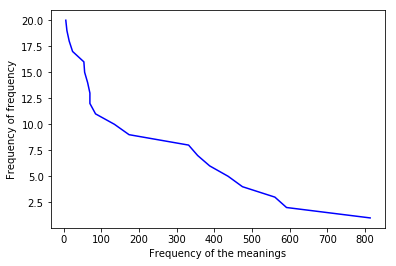

In [86]:
#Aim: to plot frequency of words that have similar meanings vs frequency of frequency

#Finding number of words that have similar meanings with the thesaurus above
d = {}
for i in tokens:
    if wordnet.synsets(i):
        for j in range(len(thesaurus)):
            if i in thesaurus[j]:
                if j not in d: d[j] = 1
                else: d[j] += 1

#Sorting according to the decreasing order i.e finding the frequency
e = sorted(list(d.values()), reverse = True)

#Plotting it in a graph
plt.plot(e, [i for i in range(1, len(e) + 1)], 'b-')
plt.xlabel("Frequency of the meanings")
plt.ylabel("Frequency of frequency")
plt.show()
#References: https://matplotlib.org/ and https://classroom.google.com/u/0/c/NDEzNDY5MjY2NTFa

# Heap's law

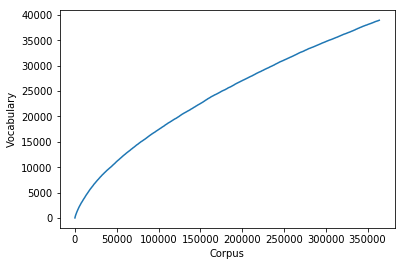

In [96]:
#finding number of words that have a constant length
Vocabulary = []
VL = [0]
for i in range(len(tokens)):
    if tokens[i] not in Vocabulary: 
        Vocabulary.append(tokens[i])
        VL.append(VL[-1] + 1)
    else: VL.append(VL[-1])

#plotting it in a graph       
plt.xlabel("Corpus")
plt.ylabel("Vocabulary")
plt.plot([i for i in range(1, len(tokens) + 1)], VL[1:])
plt.show()
#References: https://matplotlib.org/ and https://classroom.google.com/u/0/c/NDEzNDY5MjY2NTFa